### Ejercicio 7

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
f = lambda x: 1 / (1 + 25*(x**2))

def interpolar(n):
    x = np.linspace(-1, 1, n+1)
    y = f(x)
    return x, y

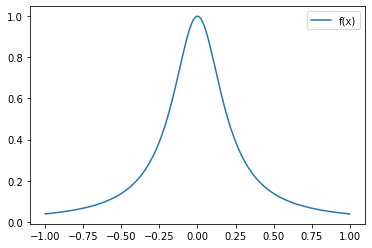

In [6]:
# plot the function
x = np.linspace(-1, 1, 1000)
y = f(x)

# plot the interpolation
x_5, y_5 = interpolar(5)
x_10, y_10 = interpolar(10)
x_15, y_15 = interpolar(15)

plt.plot(x, y, label='f(x)')
plt.legend()
plt.show()

### Ejercicio 8

In [60]:
# Use poly fit to fit an n degree polynomial to the data
# data = np.array([[1950,1960,1970,1980,1990,2000],
#                  [17,20.5,23.9,27.9,32.6,36.9]])

a = 0.7
b = 2.4
c = -0.5
d = 1.5

f = lambda x: a * np.exp(b*x**2 + c*x + d)

logf = lambda x: np.log(a) + b*x**2 + c*x + d

x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
logy = logf(x)

# Create a matrix with 1s in the first column, x^2 in the second, x in the third and 1s again in the fourth column
A = np.array([[1, x[0]**2, x[0], 1],
              [1, x[1]**2, x[1], 1],
              [1, x[2]**2, x[2], 1],
              [1, x[3]**2, x[3], 1],
              [1, x[4]**2, x[4], 1]])

# Compute x = (A^t A)^-1 * A^t * logy using the pseudo inverse
x = np.linalg.pinv(A).dot(logy)

print("ã={:.2f}, b={:.2f}, c={:.2f}, d={:.2f}\n".format((x[0]), x[1], x[2], x[3]))
print("a={:.2f}, b={:.2f}, c={:.2f}, d={:.2f}".format(np.exp(x[0]), x[1], x[2], x[3]))

ã=0.57, b=2.40, c=-0.50, d=0.57

a=1.77, b=2.40, c=-0.50, d=0.57


In [57]:
# compute the error
error = np.linalg.norm(A.dot(x) - logy)
print("Error: {:.2f}".format(error))


Error: 0.00


In [58]:
x[0] += 0.15
x[-1] -= 0.15
x

array([ 0.72166253,  2.4       , -0.5       ,  0.42166253])

In [59]:
# compute the error
error = np.linalg.norm(A.dot(x) - logy)
print("Error: {:.2f}".format(error))

Error: 0.00


In [61]:
# ahora NO suman el mismo valor que antes
x[0] += 0.2
x[-1] -= 0.1
x

array([ 0.77166253,  2.4       , -0.5       ,  0.47166253])

In [62]:
# compute the error
error = np.linalg.norm(A.dot(x) - logy)
print("Error: {:.2f}".format(error))

Error: 0.22


In [42]:
# SVD decomposition of A
U, S, V = np.linalg.svd(A)

print("\nU =\n", U)
print("\nS =\n", S)
print("\nV =\n", V)



U =
 [[-0.43178834 -0.61398717  0.56770844  0.32789195 -0.08229571]
 [-0.43895475 -0.3410911  -0.24980824 -0.79219038 -0.03171478]
 [-0.44659783 -0.03967321 -0.53356414  0.40921946  0.58891863]
 [-0.45471758  0.29026649 -0.28355927  0.24656444 -0.75351006]
 [-0.46331399  0.648728    0.50020637 -0.19148546  0.27860192]]

S =
 [3.24298634e+00 3.60437194e-01 3.20102671e-02 2.55602901e-17]

V =
 [[-6.89294454e-01 -7.72908556e-02 -2.09218631e-01 -6.89294454e-01]
 [-1.54692693e-01  5.14016133e-01  8.29414105e-01 -1.54692693e-01]
 [ 3.07136255e-02  8.54291250e-01 -5.17976648e-01  3.07136255e-02]
 [ 7.07106781e-01 -1.47877573e-15  1.07448944e-15 -7.07106781e-01]]


In [ ]:
n = 2
p = np.polyfit(x, y, n+1)
print(p)

# Evaluate polynomial p in a grid of points between -1 and 1
grid_x = np.linspace(-0.2, 0.7, 1000)
grid_y = logf(grid_x)


# Plot data and polynomial
plt.plot(grid_x, grid_y, '-')
plt.plot(x, np.exp(p[0]) + np.polyval(p[1:], x), 'o')
plt.show()